# Trending YouTube Video Statistics
### Data Exploration and Visualization With Python
***

<img src='https://upload.wikimedia.org/wikipedia/commons/e/e1/Logo_of_YouTube_%282015-2017%29.svg'>

# Table of Contents

* [1. Importing dataset and data preprocessing](#importing_dataset_and_data_preprocessing) <br>
 * [1.1. Importing essential libraries](#importing_essential_libraries) <br>
 * [1.2. Importing datasets](#importing_datasets) <br>
 * [1.3. Let's summarize the datasets](#lets_summarize_the_dataset) <br>
 * [1.4. Data preprocessing and feature engineering](#data_preprocessing_and_feature_engineering) <br>
   * [1.4.1. Datetime format of Trending date and Publish time](#datetime_format_of_trending_date_and_publish_time) <br>
   * [1.4.2. Assignment of the film category](#assignment_of_the_film_category) <br>
   * [1.4.3. Dislike percentage](#dislike_percentage) <br>
   * [1.4.4. Number of words with all upper case in title](#number_of_words_with_all_upper_case_in_title) <br>
   * [1.4.5. Distribution of basic parameters](#distribution_of_basic_parameters) <br>
   * [1.4.6. What about duplicates?](#what_about_duplicates) <br>
   * [1.4.7. Time to trend](#time_to_trend) <br>
<br>
* [2. Data Visualization](#data_visualization) <br>
 * [2.1. Best time to publish video](#best_time_to_publish_video) <br>
 * [2.2. It got viral](#it_got_viral) <br>
 * [2.3. Most influential creators](#most_influential_creators) <br>
 * [2.4. Variety of topics](#variety_of_topics) <br>
 * [2.5. Late bloomers](#late_bloomers) <br>
 * [2.6. No such thing as bad press, right?](#no_such_thing_as_bad_press_right) <br>
 * [2.7. Likes vs dislikes distribution!](#likes_vs_dislikes_distribution) <br>

## 1. Importing dataset and data preprocessing
<a id="importing_dataset_and_data_preprocessing"></a>

### 1.1. Importing essential libraries
<a id="importing_essential_libraries"></a>

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

### 1.2. Importing dataset
<a id="importing_datasets"></a>

In [2]:
us_videos = pd.read_csv('vis/USvideos.csv')
us_videos_categories = pd.read_json('vis/US_category_id.json')

### 1.3. Let's summarize the dataset
<a id="lets_summarize_the_dataset"></a>

In [3]:
us_videos.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...


In [4]:
us_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

### 1.4. Data preprocessing and feature engineering
<a id="data_preprocessing_and_feature_engineering"></a>

### 1.4.1. Datetime format of Trending date and Publish time
<a id="datetime_format_of_trending_date_and_publish_time"></a>

<b>NOTE:</b> We immediately see, that in the first place we have to process the raw data loaded from the file. Firstly we will transform ```trending_date``` as well as ```publish_time``` from string to datetime format. This will allow us to easily perform arithmetic operations and compare these values. ```publish_time``` column will be divided into two separate ones ```publish_date``` and ```publish_time```. I am also curious what time it is best to publish videos to increase the likelihood of treanding. For this reason, I will create an additional column storing the time of publication - ```publish_hour``` .

In [5]:
# Transforming Trending date column to datetime format
us_videos['trending_date'] = pd.to_datetime(us_videos['trending_date'], format='%y.%d.%m').dt.date

# Transforming Trending date column to datetime format and splitting into two separate ones
publish_time = pd.to_datetime(us_videos['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
us_videos['publish_date'] = publish_time.dt.date
us_videos['publish_time'] = publish_time.dt.time
us_videos['publish_hour'] = publish_time.dt.hour

In [33]:
us_videos.head(3)

,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,...,video_error_or_removed,description,publish_date,publish_hour,dislike_percentage,all_upper_in_title,likes_log,views_log,dislikes_log,comment_log
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,22,17:13:01,SHANtell martin,748374,57527,...,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13,17,0.049030,7,10.960027,13.525659,7.995307,9.677528
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,Entertainment,24,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,...,False,"One year after the presidential election, John...",2017-11-13,7,0.059479,1,11.484382,14.698775,8.723719,9.449672
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,23,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,...,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017-11-12,19,0.035271,0,11.891595,14.975981,8.582981,9.009692


### 1.4.2. Assignment of the film category
<a id="assignment_of_the_film_category"></a>

<b>NOTE:</b> Next we will connect the films with the categories they belong to. We will associate the information in two files: ```USvideos.csv``` and ```US_category_id.json``` .

In [7]:
# We'll use a very nice python featur - dictionary comprehension, to extract most important data from US_category_id.json
categories = {category['id']: category['snippet']['title'] for category in us_videos_categories['items']}

# Now we will create new column that will represent name of category
us_videos.insert(4, 'category', us_videos['category_id'].astype(str).map(categories))

### 1.4.3. Dislike percentage
<a id="dislike_percentage"></a>

<b>NOTE:</b> We also count what percentage of assessments are negative ratings.

In [8]:
us_videos['dislike_percentage'] = us_videos['dislikes'] / (us_videos['dislikes'] + us_videos['likes'])

### 1.4.4. Number of words with all upper case in title
<a id="number_of_words_with_all_upper_case_in_title"></a>

In [9]:
# Helper function
def numberOfUpper(string):
    i = 0
    for word in string.split():
        if word.isupper():
            i += 1
    return(i)

us_videos["all_upper_in_title"] = us_videos["title"].apply(numberOfUpper)

### 1.4.5. Distribution of basic parameters
<a id="distribution_of_basic_parameters"></a>

In [10]:
us_videos['likes_log'] = np.log(us_videos['likes'] + 1)
us_videos['views_log'] = np.log(us_videos['views'] + 1)
us_videos['dislikes_log'] = np.log(us_videos['dislikes'] + 1)
us_videos['comment_log'] = np.log(us_videos['comment_count'] + 1)

### 1.4.6. What about duplicates?
<a id="what_about_duplicates"></a>

<b>NOTE:</b> Because many of the films have been trending you several times, we will create a separate datasets in which we will get rid of repetitions. Still, we leave the original dataset, because there is a lot of interesting information in it.

In [11]:
us_videos_last = us_videos.drop_duplicates(subset=['video_id'], keep='last', inplace=False)
us_videos_first = us_videos.drop_duplicates(subset=['video_id'], keep='first', inplace=False)

In [12]:
print("us_videos dataset contains {} videos".format(us_videos.shape[0]))
print("us_videos_first dataset contains {} videos".format(us_videos_first.shape[0]))
print("us_videos_last dataset contains {} videos".format(us_videos_last.shape[0]))

us_videos dataset contains 40949 videos
us_videos_first dataset contains 6351 videos
us_videos_last dataset contains 6351 videos


### 1.4.7. Time to trend
<a id="time_to_trend"></a>

<b>NOTE:</b> Lastly we will create new feature ```time to trend``` representing the time (in days) between publication and the day when it became trending.

In [13]:
us_videos_first["time_to_trend"] = (us_videos_first.trending_date - us_videos_first.publish_date) / np.timedelta64(1, 'D')

## 2. Data Visualization
<a id="data_visualization"></a>

### 2.1. Best time to publish video
<a id="best_time_to_publish_video"></a>

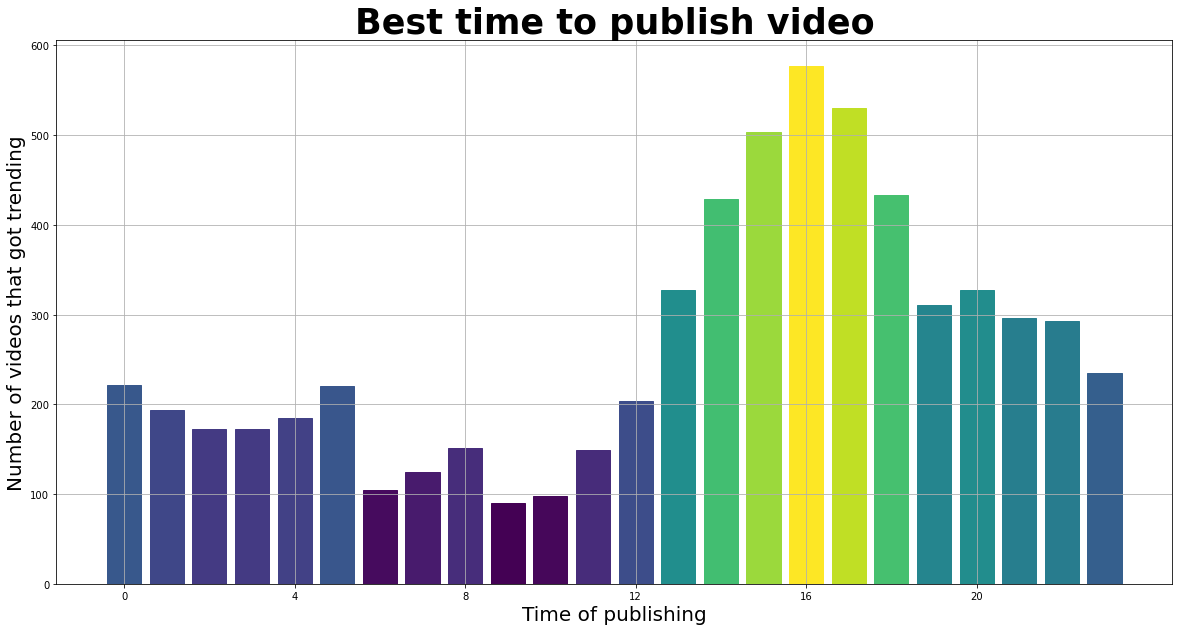

In [14]:
# Initialization of the list storing counters for subsequent publication hours
publish_h = [0] * 24

for index, row in us_videos_first.iterrows():
    publish_h[row["publish_hour"]] += 1
    
values = publish_h
ind = np.arange(len(values))


# Creating new plot
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.yaxis.grid()
ax.xaxis.grid()
bars = ax.bar(ind, values)

# Sampling of Colormap
for i, b in enumerate(bars):
    b.set_color(plt.cm.viridis((values[i] - min(values))/(max(values)- min(values))))
    
plt.ylabel('Number of videos that got trending', fontsize=20)
plt.xlabel('Time of publishing', fontsize=20)
plt.title('Best time to publish video', fontsize=35, fontweight='bold')
plt.xticks(np.arange(0, len(ind), len(ind)/6), [0, 4, 8, 12, 16, 20])

plt.show()

### 2.2. It got viral
<a id="it_got_viral"></a>

In [15]:
from IPython.display import HTML, display

# We choose the 10 most trending videos
selected_columns = ['title', 'channel_title', 'thumbnail_link', 'publish_date', 'category']

most_frequent = us_videos.groupby(selected_columns)['video_id'].agg(code_count= len).sort_values("code_count", ascending=False).head(10).reset_index()

# Construction of HTML table with miniature photos assigned to the most popular movies
table_content = ''
max_title_length = 50

for date, row in most_frequent.T.iteritems():
    HTML_row = '<tr>'
    HTML_row += '<td><img src="' + str(row[2]) + '"style="width:100px;height:100px;"></td>'
    HTML_row += '<td>' + str(row[1]) + '</td>'
    HTML_row += '<td>' + str(row[0])  + '</td>'
    HTML_row += '<td>' + str(row[4]) + '</td>'
    HTML_row += '<td>' + str(row[3]) + '</td>'
    
    table_content += HTML_row + '</tr>'

display(HTML('<table><tr><th>Photo</th><th>Channel Name</th><th style="width:250px;">Title</th><th>Category</th><th>Publish Date</th></tr>{}</table>'.format(table_content)))

Photo,Channel Name,Title,Category,Publish Date
,Lucas and Marcus,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,Entertainment,2018-05-13
,Charlie Puth,Charlie Puth - BOY [Official Audio],Music,2018-05-11
,Rooster Teeth,Rooster Teeth Animated Adventures - Millie So Serious,Film & Animation,2018-05-14
,grav3yardgirl,Why I'm So Scared (being myself and crying too much),Howto & Style,2018-05-14
,SamSmithWorldVEVO,Sam Smith - Pray (Official Video) ft. Logic,Music,2018-05-09
,Unbox Therapy,"The ULTIMATE $30,000 Gaming PC Setup",Science & Technology,2018-05-13
,Complex,YoungBoy Never Broke Again Goes Sneaker Shopping With Complex,Entertainment,2018-05-14
,nigahiga,FORTNITE The Movie (Official Fake Trailer),Entertainment,2018-05-11
,Selena Gomez,Selena Gomez - Back To You (Lyric Video),Film & Animation,2018-05-10
,BostonDynamics,"Getting some air, Atlas?",Science & Technology,2018-05-10


### 2.3. Most influential creators
<a id="most_influential_creators"></a>

In [16]:
max_title_length = 30
number_of_creators = 25

top_creators = us_videos.groupby(['channel_title'])['channel_title'].agg(code_count= len).sort_values(
 "code_count", ascending=False
).head(number_of_creators).reset_index()

trace1 = go.Bar(
    y = [(x if len(x) <= max_title_length else x[:max_title_length] + "...") for x in top_creators.channel_title.values][::-1],
    x = top_creators['code_count'].tolist()[::-1],
    name = "Top creators",
    orientation = 'h',
    marker=dict(
        color='rgba(55, 128, 191, 0.7)',
        line=dict(
            color='rgba(55, 128, 191, 1.0)',
            width=2,
        )
    ),
)

data = [trace1]

layout = go.Layout(
    title = 'Most influential creators',
    width=900,
    height=600,
    margin=go.Margin(
        l=180,
        r=50,
        b=80,
        t=80,
        pad=10
    ),
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    yaxis = dict(
        anchor = 'x',
        rangemode='tozero',
        tickfont=dict(
            size=10
        ),
        ticklen=1
    ), 
    xaxis = dict(
        title= 'Number of times video made by creator got trending',
        anchor = 'x',
        rangemode='tozero'
    ), 
    legend=dict(x=0.6, y=0.07)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

C:\Users\Adem\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:405: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




### 2.4. Variety of topics
<a id="variety_of_topics"></a>

In [17]:
max_title_length = 30
number_of_creators = 10

top_creators = us_videos.groupby(['category'])['category'].agg(code_count= len).sort_values(
    "code_count", ascending=False
).head(number_of_creators).reset_index()

trace1 = go.Bar(
    y = [(x if len(x) <= max_title_length else x[:max_title_length] + "...") for x in top_creators.category.values][::-1],
    x = top_creators['code_count'].tolist()[::-1],
    name = "Top categories",
    orientation = 'h',
    marker=dict(
        color='rgba(55, 128, 191, 0.7)',
        line=dict(
            color='rgba(55, 128, 191, 1.0)',
            width=2,
        )
    ),
)

data = [trace1]

layout = go.Layout(
    title = 'Most popular categories',
    width=900,
    height=600,
    margin=go.Margin(
        l=180,
        r=50,
        b=80,
        t=80,
        pad=10
    ),
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    yaxis = dict(
        anchor = 'x',
        rangemode='tozero',
        tickfont=dict(
            size=10
        ),
        ticklen=1
    ), 
    xaxis = dict(
        title= 'The number of times the video of a given category was trending',
        anchor = 'x',
        rangemode='tozero'
    ), 
    legend=dict(x=0.6, y=0.07)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### 2.5. Late bloomers
<a id="late_bloomers"></a>
This section dedicated to videos that waited the longest before they became trending. I also checked how many views they had when they hit the YouTube home page.

In [18]:
max_title_length = 20
number_of_late_bloomers = 20

late_bloomers = us_videos_first.sort_values(["time_to_trend"], ascending=False).head(number_of_late_bloomers)
late_bloomers_title = [(x if len(x) <= max_title_length else x[:max_title_length] + "...") for x in late_bloomers.title.values]
late_bloomers_days = late_bloomers.time_to_trend.values
late_bloomers_views = late_bloomers.views.values

trace1 = go.Bar(
    x = late_bloomers_title,
    y = late_bloomers_days,
    name='Number of days',
    marker=dict(
        color='rgba(55, 128, 191, 0.7)',
        line=dict(
            color='rgba(55, 128, 191, 1.0)',
            width=2,
        )
    )
)
trace2 = go.Bar(
    x = late_bloomers_title,
    y = late_bloomers_views,
    name='total views',
    marker=dict(
        color='rgba(219, 64, 82, 0.7)',
        line=dict(
            color='rgba(219, 64, 82, 1.0)',
            width=2,
        )
    ),
    yaxis='y2'
)


data = [trace1, trace2]
layout = go.Layout(
    barmode='group',
    title = 'Late bloomers',
    width=900,
    height=500,
    margin=go.Margin(
        l=75,
        r=75,
        b=120,
        t=80,
        pad=10
    ),
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    yaxis = dict(
        title= 'Number of days until becoming trending',
        anchor = 'x',
        rangemode='tozero'
    ),   
    yaxis2=dict(
        title='Total number of views',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right',
        anchor = 'x',
        rangemode = 'tozero',
        dtick = 61000
    ),
    #legend=dict(x=-.1, y=1.2)
    legend=dict(x=0.1, y=0.05)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

### 2.6. No such thing as bad press, right?
<a id="no_such_thing_as_bad_press_right"></a>
This section dedicated to videos that has gained popularity on YT by being disliked.

In [19]:
max_title_length = 20
number_of_late_bloomers = 10

most_disliked = us_videos_first.sort_values(["dislikes"], ascending=False).head(number_of_late_bloomers)
most_disliked_title = [(x if len(x) <= max_title_length else x[:max_title_length] + "...") for x in late_bloomers.title.values]
most_disliked_l_number = most_disliked.likes.values
most_disliked_dl_number = most_disliked.dislikes.values
most_disliked_dl_percentage = most_disliked.dislike_percentage.values

trace1 = go.Bar(
    x = most_disliked_title,
    y = most_disliked_l_number,
    name='Number of likes',
    marker=dict(
        color='rgba(55, 128, 191, 0.7)',
        line=dict(
            color='rgba(55, 128, 191, 1.0)',
            width=2,
        )
    )
)
trace2 = go.Bar(
    x = most_disliked_title,
    y = most_disliked_dl_number,
    name='Number of dislikes',
    marker=dict(
        color='rgba(219, 64, 82, 0.7)',
        line=dict(
            color='rgba(219, 64, 82, 1.0)',
            width=2,
        )
    )
)

trace3 = go.Scatter(
    x = most_disliked_title,
    y = most_disliked_dl_percentage,
    name='Dislike percentage',
    mode = 'markers',
    marker=dict(
        symbol="hexagon-dot",
        size=15
    ),
    yaxis='y2'
)

data = [trace1, trace2, trace3]
layout = go.Layout(
    barmode='group',
    title = 'No such thing as bad press, right?',
    width=900,
    height=500,
    margin=go.Margin(
        l=75,
        r=75,
        b=120,
        t=80,
        pad=10
    ),
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    yaxis = dict(
        title= 'Number of likes/dislikes',
        anchor = 'x',
        rangemode='tozero'
    ),   
    yaxis2=dict(
        title='Dislike percentage',
        titlefont=dict(
            color='rgb(148, 103, 189)'
        ),
        tickfont=dict(
            color='rgb(148, 103, 189)'
        ),
        overlaying='y',
        side='right',
        anchor = 'x',
        rangemode = 'tozero',
        dtick = 0.165
    ),
    legend=dict(x=0.75, y=1)
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

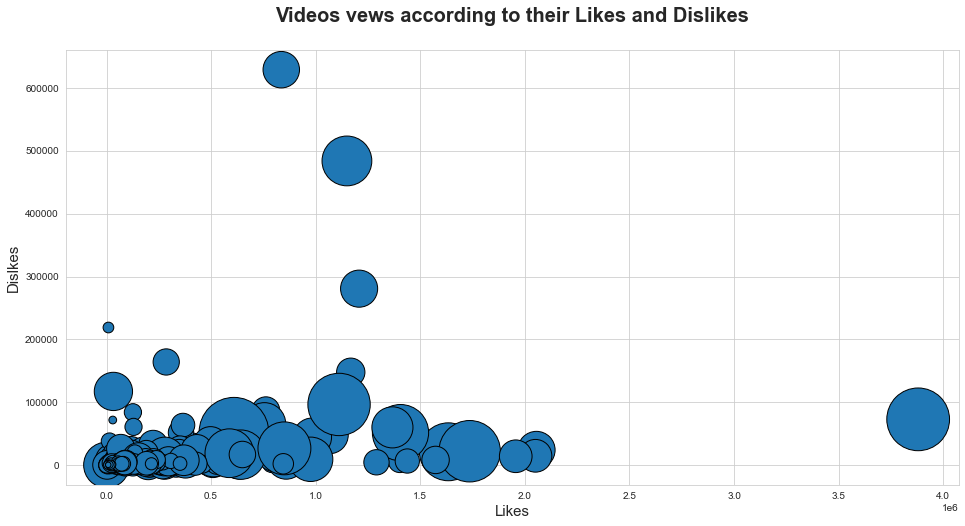

In [20]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
plt.title('Videos vews according to their Likes and Dislikes', fontsize=20, fontweight='bold', y=1.05,)
plt.xlabel('Likes', fontsize=15)
plt.ylabel('Dislkes', fontsize=15)

likes = us_videos_first["likes"].values
dislikes = us_videos_first["dislikes"].values
views = us_videos_first["views"].values

plt.scatter(likes, dislikes, s = views/10000, edgecolors='black')
plt.show()

### 2.7. Likes vs dislikes distribution!
<a id="likes_vs_dislikes_distribution"></a>

In [21]:
hist_data = [us_videos_first["dislikes_log"].values, us_videos_first["likes_log"].values]

group_labels = ['Dislikes log distribution', 'Likes log distribution']
colors = ['#A6ACEC', '#63F5EF']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, colors=colors,
                         bin_size=0.5, show_rug=False)

# Add title
fig['layout'].update(title='Likes vs dislikes', legend=dict(x=0.65, y=0.8))

# Plot!
py.iplot(fig, filename='Hist and Curve')

# Partie acp

# **Analyse en composantes principales sur les vidéos tendances de YouTube**

## Introduction
**YouTube** a su s'ancrer dans le paysage quotidien des jeunes générations ces dernières années. Ce média social, plateforme d'hébergement de vidéos, recense plusieurs centaines de millions de visiteurs chaque mois et a marqué un tournant majeur dans le domaine du divertissement.
Pour résumer brièvement le principe, les auteurs y publient des vidéos qui pourront être visionnées par tout le monde : chaque personne qui visionne l'oeuvre ainsi constituée apporte une **vue**. Il y a aussi possibilité de signaler son appréciation du contenu en laissant un **like**, ou à l'inverse, sa déception avec un **dislike**. Enfin, des messages peuvent être postés sous la vidéo, communément appelés **commentaires**, signe d'activité ou de débat au sein de la communauté des spectateurs.
YouTube possède aussi des catégories : nous nous intéresserons aussi aux **Tendances** à qui rassemblent les vidéos les plus regardées et mises en avant des derniers jours, afin d'avoir les éléments précedemment cités en nombre suffisant pour l'étude. Bien évidemment, cette catégorie fluctuant au fil des semaines, on se concentra essentiellement sur des oeuvres qui y sont autrefois passées dans la même période.

Nous allons donc ici observer et analyser ces données, afin de peut-être en tirer des corrélations et conclusions.

## La base de données
Source : [Trending YouTube Video Statistics](https://www.kaggle.com/datasnaek/youtube-new)

La dataset est formée des colonnes suivantes :
* *video_id* : identifiant YouTube de la vidéo
* *trending_date* : date du passage en tendances de la vidéo
* *title* : titre de la vidéo
* *channel_title* : titre de la chaîne YouTube qui a posté la vidéo
* *category_id* : catégorie de la vidéo
* *publish_time* : date de publication de la vidéo
* *tags* : étiquettes données à la vidéo
* *views* : nombre de vues de la vidéo
* *likes* : nombre de likes de la vidéo
* *dislikes* : nombre de dislikes de la vidéo
* *comment_count* : nombre de commentaires de la vidéo
* *thumbnail_link* : lien de l'image miniature de la vidéo
* *comments_disabled* : désactivation des commentaires de la vidéo
* *ratings_disabled* : désactivation des likes et dislikes de la vidéo
* *video_error_or_removed* : vidéo inaccessible ou retirée
* *description* : description de la vidéo

In [22]:
# Librairies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [23]:
# Récupération de la base de données
df = pd.read_csv("vis/USvideos.csv")

# Élimination des lignes indésirables
df = df[df.comments_disabled == False] # On souhaite les commentaires activés
df = df[df.ratings_disabled == False] # On souhaite les likes et dislikes activés
df = df[df.video_error_or_removed == False] # On souhaite la vidéo active à l'époque du dataset
df = df.dropna() # On souhaite des données complètes

# Stockage du nombre d'individus
rows = df.shape[0]

# Premier affichage
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


## Obtention de données centrées réduites
Avant d'entamer l'ACP, il nous faut sélectionner et préparer les données utilisées par la suite : on utilise pour cela une fonction prévue à cet effet.

In [24]:
# On conserve les 4 colonnes qui nous intéressent
select = ['views', 'likes', 'dislikes', 'comment_count']

# On normalise la dataset ainsi conservée
dfnorm = df[select]
dfnorm = StandardScaler().fit_transform(dfnorm)

# On vérifie que la normalisation est un succès
print("Moyennes :\n", np.mean(dfnorm, axis = 0)) # Les moyennes devraient valoir 0 ou être infiniment petites avec l'arrondi
print("\nÉcarts-types :\n", np.std(dfnorm, axis = 0)) # Les écarts-types devraient valoir 1
print("\nMatrice de corrélation :\n", (1/rows) * np.matmul(np.transpose(dfnorm), dfnorm)) # La matrice doit avoir des 1 sur la diagonale

Moyennes :
 [-1.14571906e-17  0.00000000e+00 -5.72859528e-18  2.29143811e-17]

Écarts-types :
 [1. 1. 1. 1.]

Matrice de corrélation :
 [[1.         0.85386295 0.56142863 0.66002582]
 [0.85386295 1.         0.51507734 0.85342443]
 [0.56142863 0.51507734 1.         0.62376844]
 [0.66002582 0.85342443 0.62376844 1.        ]]


## L'Analyse en Composantes Principales
Nous entrons désormais dans le vif du sujet.
On utilisera par la suite des outils appropriés qui éviteront par exemple des manipulations fastidieuses de matrice.

In [25]:
# ACP bénigne afin d'utiliser ses fonctions de calculus de valeurs propres et variances
acp = PCA()
acp.fit_transform(dfnorm)

# Éléments nécessaire au choix du nombre de composantes principales
print("Valeurs propres :\n", acp.explained_variance_)
print("\nQualité de représentation des axes en % :\n", acp.explained_variance_ratio_ * 100)
print("\nQualité cumulée en % :\n", np.cumsum(acp.explained_variance_ratio_) * 100)

Valeurs propres :
 [3.04982738 0.55656737 0.33297758 0.06072845]

Qualité de représentation des axes en % :
 [76.24376353 13.9138337   8.32422986  1.51817292]

Qualité cumulée en % :
 [ 76.24376353  90.15759722  98.48182708 100.        ]


On observera une contribution de **90.15%** lorsqu'on ne considère que les deux premiers axes : en plus d'être la méthode de représentation la plus facile, c'est une valeur de précision relativement correcte.
Ainsi nous réaliserons un **ACP à 2 composantes principales**.

In [26]:
# On génère ici l'ACP sur laquelle nous allons travailler
n = 2 # Nombre de composantes principales
acp = PCA(n)
composantes = acp.fit_transform(dfnorm)

# On affiche les premiers résultats
print("Valeurs propres :\n", acp.explained_variance_) # On rappelle les valeurs propres conservées
print("\nMatrice de changement de base :\n", acp.components_) # La matrice de changement de base, obtenue normalement à partir des vecteurs propres
print("\nComposantes principales :\n", composantes) # Les composantes principales données par la matrice de changement de base
print("\nSomme des composantes :\n", composantes.sum(axis = 0)) # La somme par colonne des composantes principales doit valoir 0

Valeurs propres :
 [3.04982738 0.55656737]

Matrice de changement de base :
 [[ 0.50822194  0.53583982  0.43150626  0.51806225]
 [-0.28486336 -0.39894708  0.87096574 -0.0333582 ]]

Composantes principales :
 [[-0.04993854  0.06492564]
 [ 0.16591678  0.0544047 ]
 [ 0.24910314 -0.08508121]
 ...
 [-0.2650017   0.00848   ]
 [ 0.55364901 -0.35810215]
 [ 7.10515468  6.89038459]]

Somme des composantes :
 [4.75379736e-11 5.26334532e-12]


## Qualité de la représentation de chaque individu


In [27]:
# On observe les représentations des individus sur chaque axe
quality = composantes ** 2
for i in range(n):
   quality[:,i] = quality[:,i] / np.sum(dfnorm ** 2, axis=1)
print("Pourcentage de représentation des individus par axe :\n", quality * 100)

Pourcentage de représentation des individus par axe :
 [[ 2.46139038  4.16045976]
 [75.111405    8.07603451]
 [55.888404    6.51974577]
 ...
 [96.82757818  0.09915008]
 [64.99384356 27.19049024]
 [51.21253886 48.1632915 ]]


## Représentation des individus
On regardera ici la proximité (ou l'éloignement) des 10 premiers individus du dataframe : on constate une certain distance entre les vidéos très visionnées et le reste.

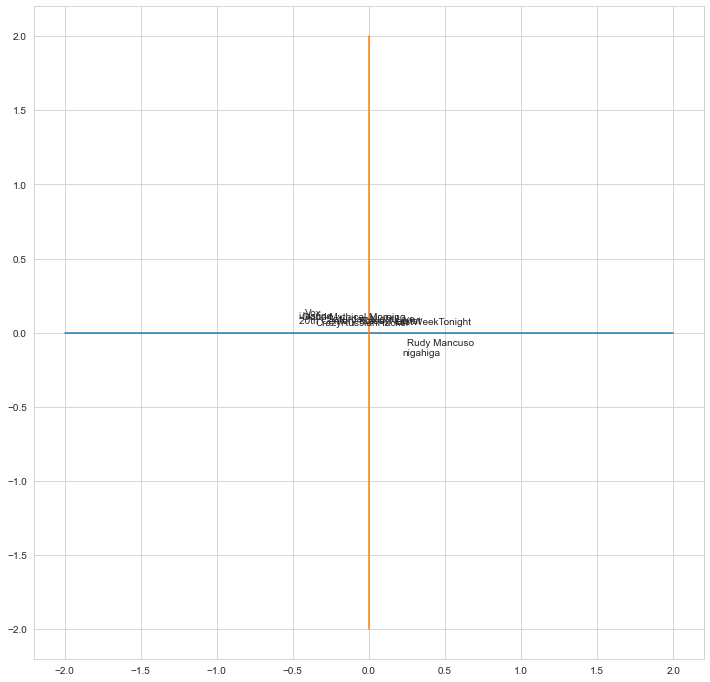

,channel_title,views,likes,dislikes,comment_count
0,CaseyNeistat,748374,57527,2966,15954
1,LastWeekTonight,2418783,97185,6146,12703
2,Rudy Mancuso,3191434,146033,5339,8181
3,Good Mythical Morning,343168,10172,666,2146
4,nigahiga,2095731,132235,1989,17518
5,iJustine,119180,9763,511,1434
6,Saturday Night Live,2103417,15993,2445,1970
7,CrazyRussianHacker,817732,23663,778,3432
8,20th Century Fox,826059,3543,119,340
9,Vox,256426,12654,1363,2368


In [28]:
# Création des figures
fig, axes = plt.subplots(figsize=(12, 12))

# Sélectionner les 10 premiers éléments comme exemple
tmp = pd.DataFrame(columns=list(df))
for i in range(10):
    tmp.loc[i]=df.iloc[i]
    plt.annotate(tmp.loc[i].channel_title, (composantes[i, 0], composantes[i, 1]))
    
# Échelle des axes
plt.plot([-2,2], [0,0])
plt.plot([0,0], [-2,2])

# Affichage du graphique et du dataset
plt.show()
select2 = ['channel_title', 'views', 'likes', 'dislikes', 'comment_count']
tmp[select2]

## Représentation des variables
On trace maintenant le **cercle des corrélations** : nous conclurons ensuite sur les résultats observés.

In [29]:
# Corrélations variables-facteurs
x = np.sqrt(acp.explained_variance_)
y = np.zeros((len(select), len(select)))
for i in range(n):
    y[:,i] = acp.components_[i,:] * x[i]

print(pd.DataFrame({'Variable':select, 'Composante 1':y[:,0], 'Composante 2':y[:,1]}))

        Variable  Composante 1  Composante 2
0          views      0.887546     -0.212518
1          likes      0.935778     -0.297628
2       dislikes      0.753572      0.649770
3  comment_count      0.904731     -0.024886


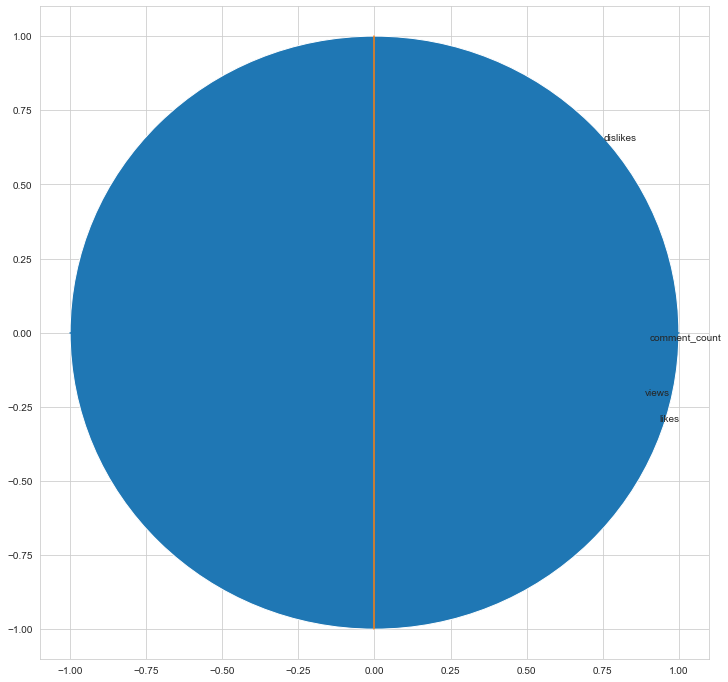

In [30]:
# Création des figures
fig, axes = plt.subplots(figsize=(12,12))

# Récupération des noms
for i in range(len(select)):
    plt.annotate(select[i],(y[i,0], y[i,1]))

# Échelle des axes
plt.plot([-1,1],[0,0])
plt.plot([0,0],[-1,1])

# Ajouter un cercle
cercle = plt.Circle((0,0), 1)
axes.add_artist(cercle)

# Affichage du cercle
plt.show()

## Conclusion
Sans grande surprise, les **vues** et le **nombre de commentaires** semblent assez **corrélés** : c'est assez logique, puisque les personnes réagiront à une vidéo et y répondront uniquement s'ils la voient.
Les **likes** ne sont **guère loin** : si une vidéo est très regardée, il risque d'y avoir des raisons derrière qui expliquent son succès et donc la potentielle quantité de likes qui en découle.
Les **dislikes** par contre sont plus **éloignés** : on conviendra du fait qu'une vidéo, populaire ou non, peut décevoir ou être détestée simplement de par son contenu, relativement indépendemment du reste.